In [1]:
# cnn_fashion_mnist.py

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical



2024-08-01 11:32:50.035038: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 11:32:50.035147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 11:32:50.199964: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape and normalize the images
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)





/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.6760 - loss: 0.8851 - val_accuracy: 0.8335 - val_loss: 0.4579
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8444 - loss: 0.4338 - val_accuracy: 0.8573 - val_loss: 0.3863
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8604 - loss: 0.3779 - val_accuracy: 0.8576 - val_loss: 0.3802
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.8776 - loss: 0.3303 - val_accuracy: 0.8603 - val_loss: 0.3745
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.8889 - loss: 0.3027 - val_accuracy: 0.8714 - val_loss: 0.3437
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8985 - loss: 0.2736 - val_accuracy: 0.8863 - val_loss: 0.3097
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9050 - loss: 0.2547 - val_accuracy: 0.8798 - val_loss: 0.3276
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9131 - loss: 0.2330 - 

In [4]:
# Make predictions
def plot_image_prediction(image, true_label, predicted_label):
    plt.figure(figsize=(5, 5))
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


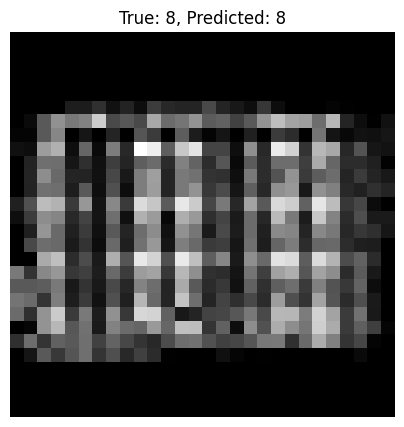

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


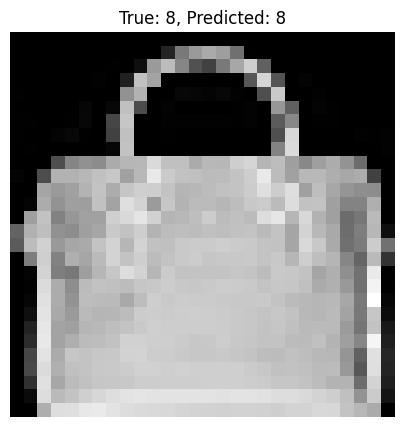

In [5]:
# Pick two random images from the test set
indices = np.random.choice(x_test.shape[0], 2, replace=False)
for index in indices:
    image = x_test[index:index+1]
    true_label = np.argmax(y_test[index])
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)
    plot_image_prediction(image, true_label, predicted_label)